In [1]:
import ROOT
import numpy as np
import pandas as pd
import xgboost as xgb
from array import array
from plugins.CMS_lumi import CMS_lumi

Welcome to JupyROOT 6.24/06


/opt/conda/envs/RAPIDS/lib/python3.8/site-packages/ROOT/_facade.py:150: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return _orig_ihook(name, *args, **kwds)
/opt/conda/envs/RAPIDS/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
rdf = ROOT.RDataFrame("outTree", "../GENstudy/minitree/2017/Minitree_HDalitz_*_m125_*.root")

In [3]:
import pickle

models = {
    "M2EB": pickle.load(open("../ID_Trainer/Results/Output_Merged2GsfID_dask_Fall17_EB_CheckALL/XGB/XGB_modelXGB.pkl", "rb")),
    "M2EE": pickle.load(open("../ID_Trainer/Results/Output_Merged2GsfID_dask_Fall17_EE_CheckALL/XGB/XGB_modelXGB.pkl", "rb"))
}

models_b = {
    "M2EB": pickle.load(open("../ID_Trainer/Results/Output_Merged2GsfID_dask_Fall17_EB_CheckALL_Binary/XGB/XGB_modelXGB.pkl", "rb")),
    "M2EE": pickle.load(open("../ID_Trainer/Results/Output_Merged2GsfID_dask_Fall17_EE_CheckALL_Binary/XGB/XGB_modelXGB.pkl", "rb"))
}

features = [    
    "rho",
    "eleSCEta_lep1",
    "eleSCRawEn_lep1",

    "eledEtaAtVtx_lep1",
    "eledPhiAtVtx_lep1",
    "elePtError_lep1",
    "eleHoverE_lep1",
    "eleEoverP_lep1",
    "eleEoverPout_lep1",
    "eleEoverPInv_lep1",

    "eleSCEtaWidth_lep1",
    "eleSCPhiWidth_lep1",
    "eleSigmaIEtaIEtaFull5x5_lep1",
    "eleSigmaIPhiIPhiFull5x5_lep1",
    "eleR9Full5x5_lep1",
    "eleBrem_lep1",

    "elePFChIso_lep1",
    "elePFPhoIso_lep1",
    "elePFNeuIso_lep1",

    "gsfPtRatio_lep1",
    "gsfDeltaR_lep1",
    "gsfRelPtRatio_lep1"
]

In [4]:
# branches = rdf.GetColumnNames()
# branches_remain = []
# for i in branches:
#     if (rdf.GetColumnType(i) == "TLorentzVector"):
#         continue

#     branches_remain.append(str(i))

arr = rdf.AsNumpy(columns = features+["category", "mcwei", "puwei", "elePresel_lep1", "eleCalibPt_lep1", "mcEta_lep1", "mcEta_lep2"])
df = pd.DataFrame(arr)
df_2gsf = df.query("category == 2")
df_2gsf

,rho,eleSCEta_lep1,eleSCRawEn_lep1,eledEtaAtVtx_lep1,eledPhiAtVtx_lep1,elePtError_lep1,eleHoverE_lep1,eleEoverP_lep1,eleEoverPout_lep1,eleEoverPInv_lep1,...,gsfPtRatio_lep1,gsfDeltaR_lep1,gsfRelPtRatio_lep1,category,mcwei,puwei,elePresel_lep1,eleCalibPt_lep1,mcEta_lep1,mcEta_lep2
1,29.287630,0.915677,113.267975,0.000122,0.013458,1.000679,0.000000,1.190173,1.041399,-0.001670,...,0.189924,0.002407,1.094873,2,0.000205,0.996398,1,78.496544,0.906474,0.908424
3,32.278988,-1.378329,68.978981,-0.002164,0.030470,5.938447,0.000000,1.735205,1.349919,-0.009483,...,0.814457,0.018898,1.201249,2,0.000205,0.820417,0,34.413471,-1.366433,-1.350402
8,35.509991,0.342693,149.173859,0.005793,0.010040,4.168768,0.000000,1.795729,3.755795,-0.005394,...,0.610897,0.014372,0.897686,2,0.000205,1.056371,1,142.564209,0.327176,0.340741
10,21.089470,0.448447,59.525368,-0.000179,-0.007408,1.317912,0.000000,1.155831,1.001711,-0.002603,...,0.638698,0.000730,1.482126,2,0.000205,0.822913,1,54.676167,0.448345,0.448282
12,43.186447,-0.997131,96.195381,0.001007,-0.021992,0.921643,0.000000,1.492831,1.389078,-0.004952,...,0.440394,0.000435,0.988173,2,0.000205,1.536849,1,63.971664,-1.015274,-1.015333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504799,44.164799,-0.062646,119.132607,0.000525,-0.001026,0.672773,0.000000,0.911174,1.459301,0.000734,...,0.017638,0.029653,1.185423,2,0.001373,0.210317,1,119.954300,-0.113751,-0.133929
504803,16.521736,1.208399,110.632805,0.001795,0.030016,2.080675,0.027915,2.795002,1.055362,-0.014808,...,0.539909,0.001761,0.644933,2,0.001373,1.319940,0,65.499298,1.199972,1.199975
504804,23.412645,-0.674245,75.451149,-0.001323,0.017200,1.127687,0.000000,1.453815,0.013927,-0.005967,...,0.689526,0.002328,1.224548,2,0.001373,0.909666,0,62.487591,-0.660782,-0.660799
504806,16.076572,2.405362,222.431503,0.001467,0.016298,1.140332,0.036752,1.544567,1.392056,-0.002242,...,0.286746,0.010312,1.010721,2,0.001373,1.325589,1,44.250340,2.397271,2.388253


In [5]:
def convert_class(arr, Type):
    if Type not in ["Merged-1Gsf", "Merged-2Gsf"]:
        print("This type of model is not available!(Merged-1Gsf or Merged-2Gsf)")
        sys.exit(1)

    new_arr = [i+1 for i in arr] if Type == "Merged-1Gsf" else [0 if i == 0 else i+1 for i in arr]

    return np.asarray(new_arr)


# EB 2gsf prediction 
df_flat_EB_2gsf = df_2gsf.query("(abs(eleSCEta_lep1) < 1.479)")
x_EB_2gsf = xgb.DMatrix(df_flat_EB_2gsf.loc[:,features].values)
df_flat_EB_2gsf.insert(loc = 0, column = "eleClass_lep1", value = convert_class(models["M2EB"].predict(x_EB_2gsf).argmax(axis = 1), "Merged-2Gsf"))
df_flat_EB_2gsf.insert(loc = 0, column = "eleXGBID_lep1", value = models_b["M2EB"].predict(x_EB_2gsf))

# EE 2gsf prediction 
df_flat_EE_2gsf = df_2gsf.query("(abs(eleSCEta_lep1) >= 1.479)")
x_EE_2gsf = xgb.DMatrix(df_flat_EE_2gsf.loc[:,features].values)
df_flat_EE_2gsf.insert(loc = 0, column = "eleClass_lep1", value = convert_class(models["M2EE"].predict(x_EE_2gsf).argmax(axis = 1), "Merged-2Gsf"))
df_flat_EE_2gsf.insert(loc = 0, column = "eleXGBID_lep1", value = models_b["M2EE"].predict(x_EE_2gsf))

df_new_EBEE = pd.concat([df_flat_EB_2gsf, df_flat_EE_2gsf], sort = False).sort_index()
df_new_EBEE

,eleXGBID_lep1,eleClass_lep1,rho,eleSCEta_lep1,eleSCRawEn_lep1,eledEtaAtVtx_lep1,eledPhiAtVtx_lep1,elePtError_lep1,eleHoverE_lep1,eleEoverP_lep1,...,gsfPtRatio_lep1,gsfDeltaR_lep1,gsfRelPtRatio_lep1,category,mcwei,puwei,elePresel_lep1,eleCalibPt_lep1,mcEta_lep1,mcEta_lep2
1,0.990594,0,29.287630,0.915677,113.267975,0.000122,0.013458,1.000679,0.000000,1.190173,...,0.189924,0.002407,1.094873,2,0.000205,0.996398,1,78.496544,0.906474,0.908424
3,0.989287,0,32.278988,-1.378329,68.978981,-0.002164,0.030470,5.938447,0.000000,1.735205,...,0.814457,0.018898,1.201249,2,0.000205,0.820417,0,34.413471,-1.366433,-1.350402
8,0.975923,0,35.509991,0.342693,149.173859,0.005793,0.010040,4.168768,0.000000,1.795729,...,0.610897,0.014372,0.897686,2,0.000205,1.056371,1,142.564209,0.327176,0.340741
10,0.907742,0,21.089470,0.448447,59.525368,-0.000179,-0.007408,1.317912,0.000000,1.155831,...,0.638698,0.000730,1.482126,2,0.000205,0.822913,1,54.676167,0.448345,0.448282
12,0.996859,0,43.186447,-0.997131,96.195381,0.001007,-0.021992,0.921643,0.000000,1.492831,...,0.440394,0.000435,0.988173,2,0.000205,1.536849,1,63.971664,-1.015274,-1.015333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504799,0.293041,2,44.164799,-0.062646,119.132607,0.000525,-0.001026,0.672773,0.000000,0.911174,...,0.017638,0.029653,1.185423,2,0.001373,0.210317,1,119.954300,-0.113751,-0.133929
504803,0.934338,0,16.521736,1.208399,110.632805,0.001795,0.030016,2.080675,0.027915,2.795002,...,0.539909,0.001761,0.644933,2,0.001373,1.319940,0,65.499298,1.199972,1.199975
504804,0.804663,0,23.412645,-0.674245,75.451149,-0.001323,0.017200,1.127687,0.000000,1.453815,...,0.689526,0.002328,1.224548,2,0.001373,0.909666,0,62.487591,-0.660782,-0.660799
504806,0.963729,0,16.076572,2.405362,222.431503,0.001467,0.016298,1.140332,0.036752,1.544567,...,0.286746,0.010312,1.010721,2,0.001373,1.325589,1,44.250340,2.397271,2.388253


In [6]:
data = {key: df_new_EBEE[key].values for key in df_new_EBEE.columns}
rdf_new = ROOT.RDF.MakeNumpyDataFrame(data)

rdf_new.Display({"eleClass_lep1", "category"}).Print()

category | eleClass_lep1 | 
2        | 0             | 
2        | 0             | 
2        | 0             | 
2        | 0             | 
2        | 0             | 


In [7]:
rdf_new = rdf_new.Define("weight", "mcwei * puwei")

In [18]:
# selection
sel_den = "&&".join([
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    # "abs(mcEta_lep1 - mcEta_lep2) < 0.06"
    # "abs(eleSCEta_lep1) > 1.566",
    # "eleCalibPt_lep1 > 25"
])
sel_num = sel_den + "&& eleClass_lep1 == 0"
# sel_num = sel_den + "&& eleXGBID_lep1 > 0.497"
# 0.483 EB
# 0.497 EE

h_num_Sig = rdf_new.Filter(sel_num).Histo1D(("h1", " ", 3, array("d", [25., 31., 55, 150.])), "eleCalibPt_lep1", "weight").GetPtr()
h_den_Sig = rdf_new.Filter(sel_den).Histo1D(("h1", " ", 3, array("d", [25., 31., 55, 150.])), "eleCalibPt_lep1", "weight").GetPtr()
eff_Sig = ROOT.TEfficiency(h_num_Sig, h_den_Sig)
eff_Sig.SetStatisticOption(ROOT.TEfficiency.kBUniform)
eff_Sig.SetConfidenceLevel(0.683)
eff_Sig.SetPosteriorMode(1)

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [19]:
# rdf_MC = ROOT.RDataFrame("outTree", "./miniTree/2017/miniTree_DYJets_2017.root").Define("weight", "mcwei * puwei")
rdf_MC = ROOT.RDataFrame("outTree", "./miniTree/2017/miniTree_ZGToLLG_2017.root").Define("weight", "mcwei * puwei")
rdf_Da = ROOT.RDataFrame("outTree",  "./miniTree/2017/miniTree_Data_2017.root")

rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv), 
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1",
    "nGsfMatchToReco_lep1 > 1",
    # "eleClass_lep1 != 1"
    # "isEEPho_lep1 == 1",
    # "phoCalibEt_lep1 > 25"
])
sel_num = sel_den + "&& eleClass_lep1 == 0"
# sel_num = sel_den + "&& eleXGBID_lep1 > 0.497"

# 0.515
# 0.501

In [20]:
h_num_MC = rdf_MC.Filter(sel_num).Histo1D(("h1", " ", 3, array("d", [25., 31., 55, 150.])), "phoCalibEt_lep1", "weight").GetPtr()
h_den_MC = rdf_MC.Filter(sel_den).Histo1D(("h1", " ", 3, array("d", [25., 31., 55, 150.])), "phoCalibEt_lep1", "weight").GetPtr()
eff_MC = ROOT.TEfficiency(h_num_MC, h_den_MC)
eff_MC.SetStatisticOption(ROOT.TEfficiency.kBUniform)
eff_MC.SetConfidenceLevel(0.683)
eff_MC.SetPosteriorMode(1)

# Data efficiency calculation
h_num_Da = rdf_Da.Filter(sel_num).Histo1D(("h1", " ", 3, array("d", [25., 31., 55, 150.])), "phoCalibEt_lep1").GetPtr()
h_den_Da = rdf_Da.Filter(sel_den).Histo1D(("h1", " ", 3, array("d", [25., 31., 55, 150.])), "phoCalibEt_lep1").GetPtr()
eff_Da = ROOT.TEfficiency(h_num_Da, h_den_Da)
eff_Da.SetStatisticOption(ROOT.TEfficiency.kBUniform)
eff_Da.SetConfidenceLevel(0.683)
eff_Da.SetPosteriorMode(1)

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


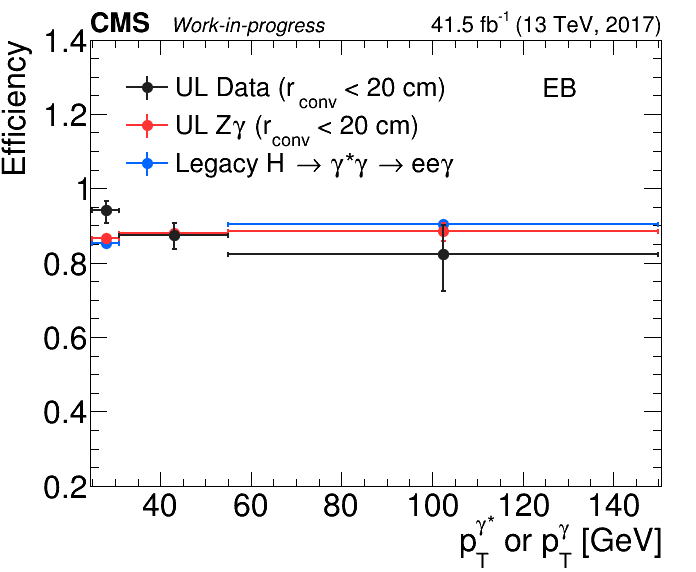

In [21]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)

c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.SetBottomMargin(0.05)
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.05)
c1.SetLeftMargin(0.13)
c1.SetBottomMargin(0.15)
c1.cd()

eff_Sig.SetTitle(";p^{#gamma*}_{T} or p^{#gamma}_{T} [GeV];Efficiency") #("global title; x-axis title; y-axis title")
eff_Sig.SetMarkerColor(ROOT.kAzure-3)
eff_Sig.SetMarkerSize(1.4)
eff_Sig.SetMarkerStyle(20)
eff_Sig.SetLineColor(ROOT.kAzure-3)
eff_Sig.SetLineWidth(2)
eff_Sig.Draw("AP")  

eff_Da.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
eff_Da.SetMarkerSize(1.4)
eff_Da.SetMarkerStyle(20)
eff_Da.SetLineColor(ROOT.TColor.GetColor("#202020"))
eff_Da.SetLineWidth(2)
eff_Da.Draw("P SAME")

eff_MC.SetMarkerColor(ROOT.kRed-4)
eff_MC.SetMarkerSize(1.4)
eff_MC.SetMarkerStyle(20)
eff_MC.SetLineColor(ROOT.kRed-4)
eff_MC.SetLineWidth(2)
eff_MC.Draw("P SAME")  
eff_Da.Draw("P SAME")

c1.Update()
efferr = eff_Sig.GetPaintedGraph()
efferr.GetYaxis().SetRangeUser(0.2, 1.4)
efferr.GetYaxis().SetTickSize(0.03)
efferr.GetYaxis().SetTitleSize(0.06)
efferr.GetYaxis().SetLabelSize(0.06)
efferr.GetYaxis().SetTitleOffset(1.1)

efferr.GetXaxis().SetRangeUser(25 ,150)
efferr.GetXaxis().SetTickSize(0.03)
efferr.GetXaxis().SetTitleSize(0.06)
efferr.GetXaxis().SetLabelSize(0.06)
# efferr.GetXaxis().SetLabelOffset(0.1)
efferr.GetXaxis().SetTitleOffset(1)


leg = ROOT.TLegend(0.17, 0.68, 0.5, 0.88)
leg.SetTextSize(0.05)
leg.AddEntry(eff_Da, "UL Data (r_{conv} < %d cm)" %rconv, "lep")
leg.AddEntry(eff_MC, "UL Z#gamma (r_{conv} < %d cm)" %rconv, "lep")
# leg.AddEntry(eff_MC, "Legacy DY+Jets, r_{conv} < %.1f cm" %rconv, "lep")
leg.AddEntry(eff_Sig, "Legacy H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "lep")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

ltx = ROOT.TLatex()
ltx.SetNDC()
ltx.SetTextFont(42)
ltx.SetTextSize(0.05)
ltx.DrawLatex(0.78, 0.83, "EB")

CMS_lumi(c1, 4, 0, "41.5 fb^{-1}", 2017, True, "Work-in-progress", "", "")

c1.Draw()

In [22]:
import os

outRes = "./plots"
if not os.path.exists(outRes):
    os.makedirs(outRes)
    
c1.Print("{}/effCompZgHDalitzWith{}cm_EB.pdf".format(outRes, rconv))

Info in <TCanvas::Print>: pdf file ./plots/effCompZgHDalitzWith20cm_EB.pdf has been created


In [13]:
# sel_den = "&&".join([
#     "elePresel_lep1 == 1",
#     "abs(eleSCEta_lep1) < 1.4442",
#     # "abs(mcEta_lep1 - mcEta_lep2) < 0.06"
#     # "abs(eleSCEta_lep1) > 1.566",
#     "eleCalibPt_lep1 > 25"
# ])
# sel_num = sel_den + "&& eleXGBID_lep1 > 0.497"
# # 0.483 EB
# # 0.497 EE

# h_Sig = rdf_new.Filter(sel_num).Histo1D(("h1", " ", 25, 0, 1), "eleXGBID_lep1", "weight").GetPtr()
# h_Sig.Scale(1. / h_Sig.Integral(-1, -1))


# rconv = 25
# sel_den = "&&".join([
#     "convVtxRadius_lep1 < {}".format(rconv), 
#     "isHggPho_lep1 == 1",
#     "isEBPho_lep1 == 1",
#     "nGsfMatchToReco_lep1 > 1",
#     # "eleClass_lep1 != 1"
#     # "isEEPho_lep1 == 1",
#     "phoCalibEt_lep1 > 25"
# ])
# sel_num = sel_den + "&& eleXGBID_lep1 > 0.497"

# h_MC = rdf_MC.Filter(sel_num).Histo1D(("h1", " ", 25, 0, 1), "eleXGBID_lep1", "weight").GetPtr()
# h_MC.Scale(1. / h_MC.Integral(-1, -1))

# h_Da = rdf_Da.Filter(sel_num).Histo1D(("h1", " ", 25, 0, 1), "eleXGBID_lep1").GetPtr()
# h_Da.Scale(1. / h_Da.Integral(-1, -1))




# c1 = ROOT.TCanvas("c1", "", 500, 500)
# c1.cd()
# # c1.SetLogy()
# h_Sig.GetXaxis().SetTitle("Merged ID score")
# h_Sig.GetYaxis().SetTitle("Normalized entries")
# # h_Sig.SetFillColor(ROOT.TColor.GetColor(248, 206, 104))
# h_Sig.SetLineColor(ROOT.kAzure-3)
# h_Sig.SetLineWidth(3)
# h_Sig.Draw("hist")

# h_MC.SetLineColor(ROOT.kRed-4)
# h_MC.SetLineWidth(3)
# h_MC.Draw("hist same")

# h_Da.SetLineColor(ROOT.TColor.GetColor("#202020"))
# h_Da.SetLineWidth(3)
# h_Da.Draw("hist same")

# leg = ROOT.TLegend(0.17, 0.68, 0.5, 0.88)
# leg.SetTextSize(0.03)
# leg.AddEntry(h_Da, "UL Data (r_{conv} < %d cm)" %rconv, "l")
# leg.AddEntry(h_MC, "UL Z#gamma (r_{conv} < %d cm)" %rconv, "l")
# # leg.AddEntry(eff_MC, "Legacy DY+Jets, r_{conv} < %.1f cm" %rconv, "lep")
# leg.AddEntry(h_Sig, "Legacy H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
# leg.SetFillColor(0)
# leg.SetLineColor(0)
# leg.Draw()

# ltx = ROOT.TLatex()
# ltx.SetNDC()
# ltx.SetTextFont(42)
# ltx.SetTextSize(0.05)
# ltx.DrawLatex(0.18, 0.62, "EB")

# c1.Draw()